In [8]:
import pandas as pd

In [9]:
from functions.cleaning import cleaningRetailOrderHistDF
from functions.parsing import parseRetailOrderHistDtypes

In [11]:
RetailOrderHistDF = pd.read_csv("D:\ML wing\Retail.OrderHistory.2.csv")

In [12]:
#original shape
RetailOrderHistDF.shape

(30, 27)

In [13]:
RetailOrderHistDF['Shipping Charge']=RetailOrderHistDF['Shipping Charge'].astype(float)

In [14]:
RetailOrderHistDF = parseRetailOrderHistDtypes(cleaningRetailOrderHistDF(RetailOrderHistDF))

In [15]:
RetailOrderHistDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 0 to 29
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype              
---  ------                          --------------  -----              
 0   Website                         30 non-null     object             
 1   Order ID                        30 non-null     object             
 2   Order Date                      30 non-null     datetime64[ns, UTC]
 3   Purchase Order Number           0 non-null      float64            
 4   Currency                        30 non-null     object             
 5   Unit Price                      30 non-null     float64            
 6   Unit Price Tax                  30 non-null     float64            
 7   Shipping Charge                 30 non-null     float64            
 8   Total Discounts                 30 non-null     float64            
 9   Total Owed                      30 non-null     float64            
 10  Shipment Item Su

In [16]:
from functions.filters import addMonth,addSeason,addTime,seasonly_spend,timely_spend


In [17]:
addMonth(RetailOrderHistDF)
RetailOrderHistDF['month']

0     September
1     September
2     September
3        August
4        August
5        August
6        August
7        August
8        August
9        August
10       August
11         July
12         July
13         July
14         July
15         July
16         June
17         June
18         June
19         June
20          May
21          May
22          May
23          May
24          May
25          May
26          May
27     February
28      October
29       August
Name: month, dtype: object

In [18]:
addTime(RetailOrderHistDF)
RetailOrderHistDF['time']

0       morning
1       morning
2       evening
3       morning
4       morning
5       morning
6     afternoon
7       morning
8       morning
9       morning
10      evening
11      morning
12      evening
13      morning
14      morning
15    afternoon
16    afternoon
17      morning
18      morning
19      morning
20      evening
21    afternoon
22      morning
23      morning
24      morning
25      morning
26      morning
27      evening
28      evening
29      morning
Name: time, dtype: object

In [19]:
addSeason(RetailOrderHistDF)
RetailOrderHistDF['season']


0     autumn
1     autumn
2     autumn
3      rainy
4      rainy
5      rainy
6      rainy
7      rainy
8      rainy
9      rainy
10     rainy
11     rainy
12     rainy
13     rainy
14     rainy
15     rainy
16     rainy
17     rainy
18     rainy
19     rainy
20    summer
21    summer
22    summer
23    summer
24    summer
25    summer
26    summer
27    winter
28    autumn
29     rainy
Name: season, dtype: object

In [20]:
timely_spending=timely_spend(RetailOrderHistDF)
timely_spending


time
afternoon    323.250000
evening      501.666667
morning      387.588889
Name: Total Owed, dtype: float64

In [21]:
seasonly_spendings=seasonly_spend(RetailOrderHistDF)
seasonly_spendings

season
autumn    285.250000
rainy     512.682353
summer    175.666667
winter    369.000000
Name: Total Owed, dtype: float64

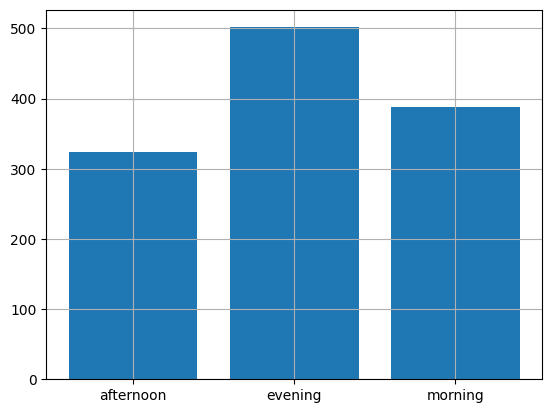

In [22]:
from matplotlib import pyplot as plt
plt.bar(x=timely_spending.index,height=timely_spending)
plt.grid()

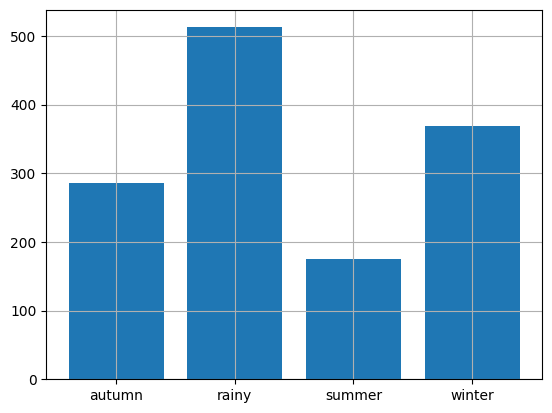

In [23]:
plt.bar(x=seasonly_spendings.index,height=seasonly_spendings)
plt.grid()